#in the terminal
    
    git clone https://github.com/tlambert03/hms_pyintro2.git

    conda create -n imgproc python
    conda activate imgproc

    cd hms_pyintro2
    pip install -r requirements.txt
    pip install czifile
    pip install cellpose-napari
    pip install 'aicsimageio[czi]' 
    pip install napari-czifile2
    

    # this is a SUPER helpful thread: https://forum.image.sc/t/reading-czi-file-in-python/39768


In [1]:
import czifile
from pathlib import Path
import os
import matplotlib.pyplot as plt
# import tifffile
import numpy as np
import cv2
# import napari
# from napari.utils import nbscreenshot

In [2]:
os.chdir('/Users/robinhood/Dropbox (HMS)/Data/imaging/processing')

# get current working directory with `cwd`
cur_dir = Path.cwd()
print(f"The current directory is {cur_dir}\n")

# specify a relative or absolute directory
#data_dir = Path("data")

# this needs to be reworked to be able to access a specific data folder. 

#img = czifile.imread(data_dir / 'wt_20210510_gthb_5.czi') will use when data file in other directory
czi = czifile.imread('wt_20210510_gthb_5.czi')
print()
print(type(czi),czi.shape,czi.dtype)

# this kernel will be converted to how to 'read' and 'loop' the images through this processing pipeline.

The current directory is /Users/robinhood/Dropbox (HMS)/Data/imaging/processing


<class 'numpy.ndarray'> (1, 1, 5, 1, 47, 1024, 1024, 1) uint16


In [4]:
# using a my_dict I can specify which channel is which gene. 
# Jeff will explain this more, but it means that I don't have to worry about making a new script for each stain. 


my_dict = {'dapi': 0}
#dapi = my_array[my_dict['dapi'], :, :]

<class 'numpy.ndarray'> (5, 47, 1024, 1024) uint16


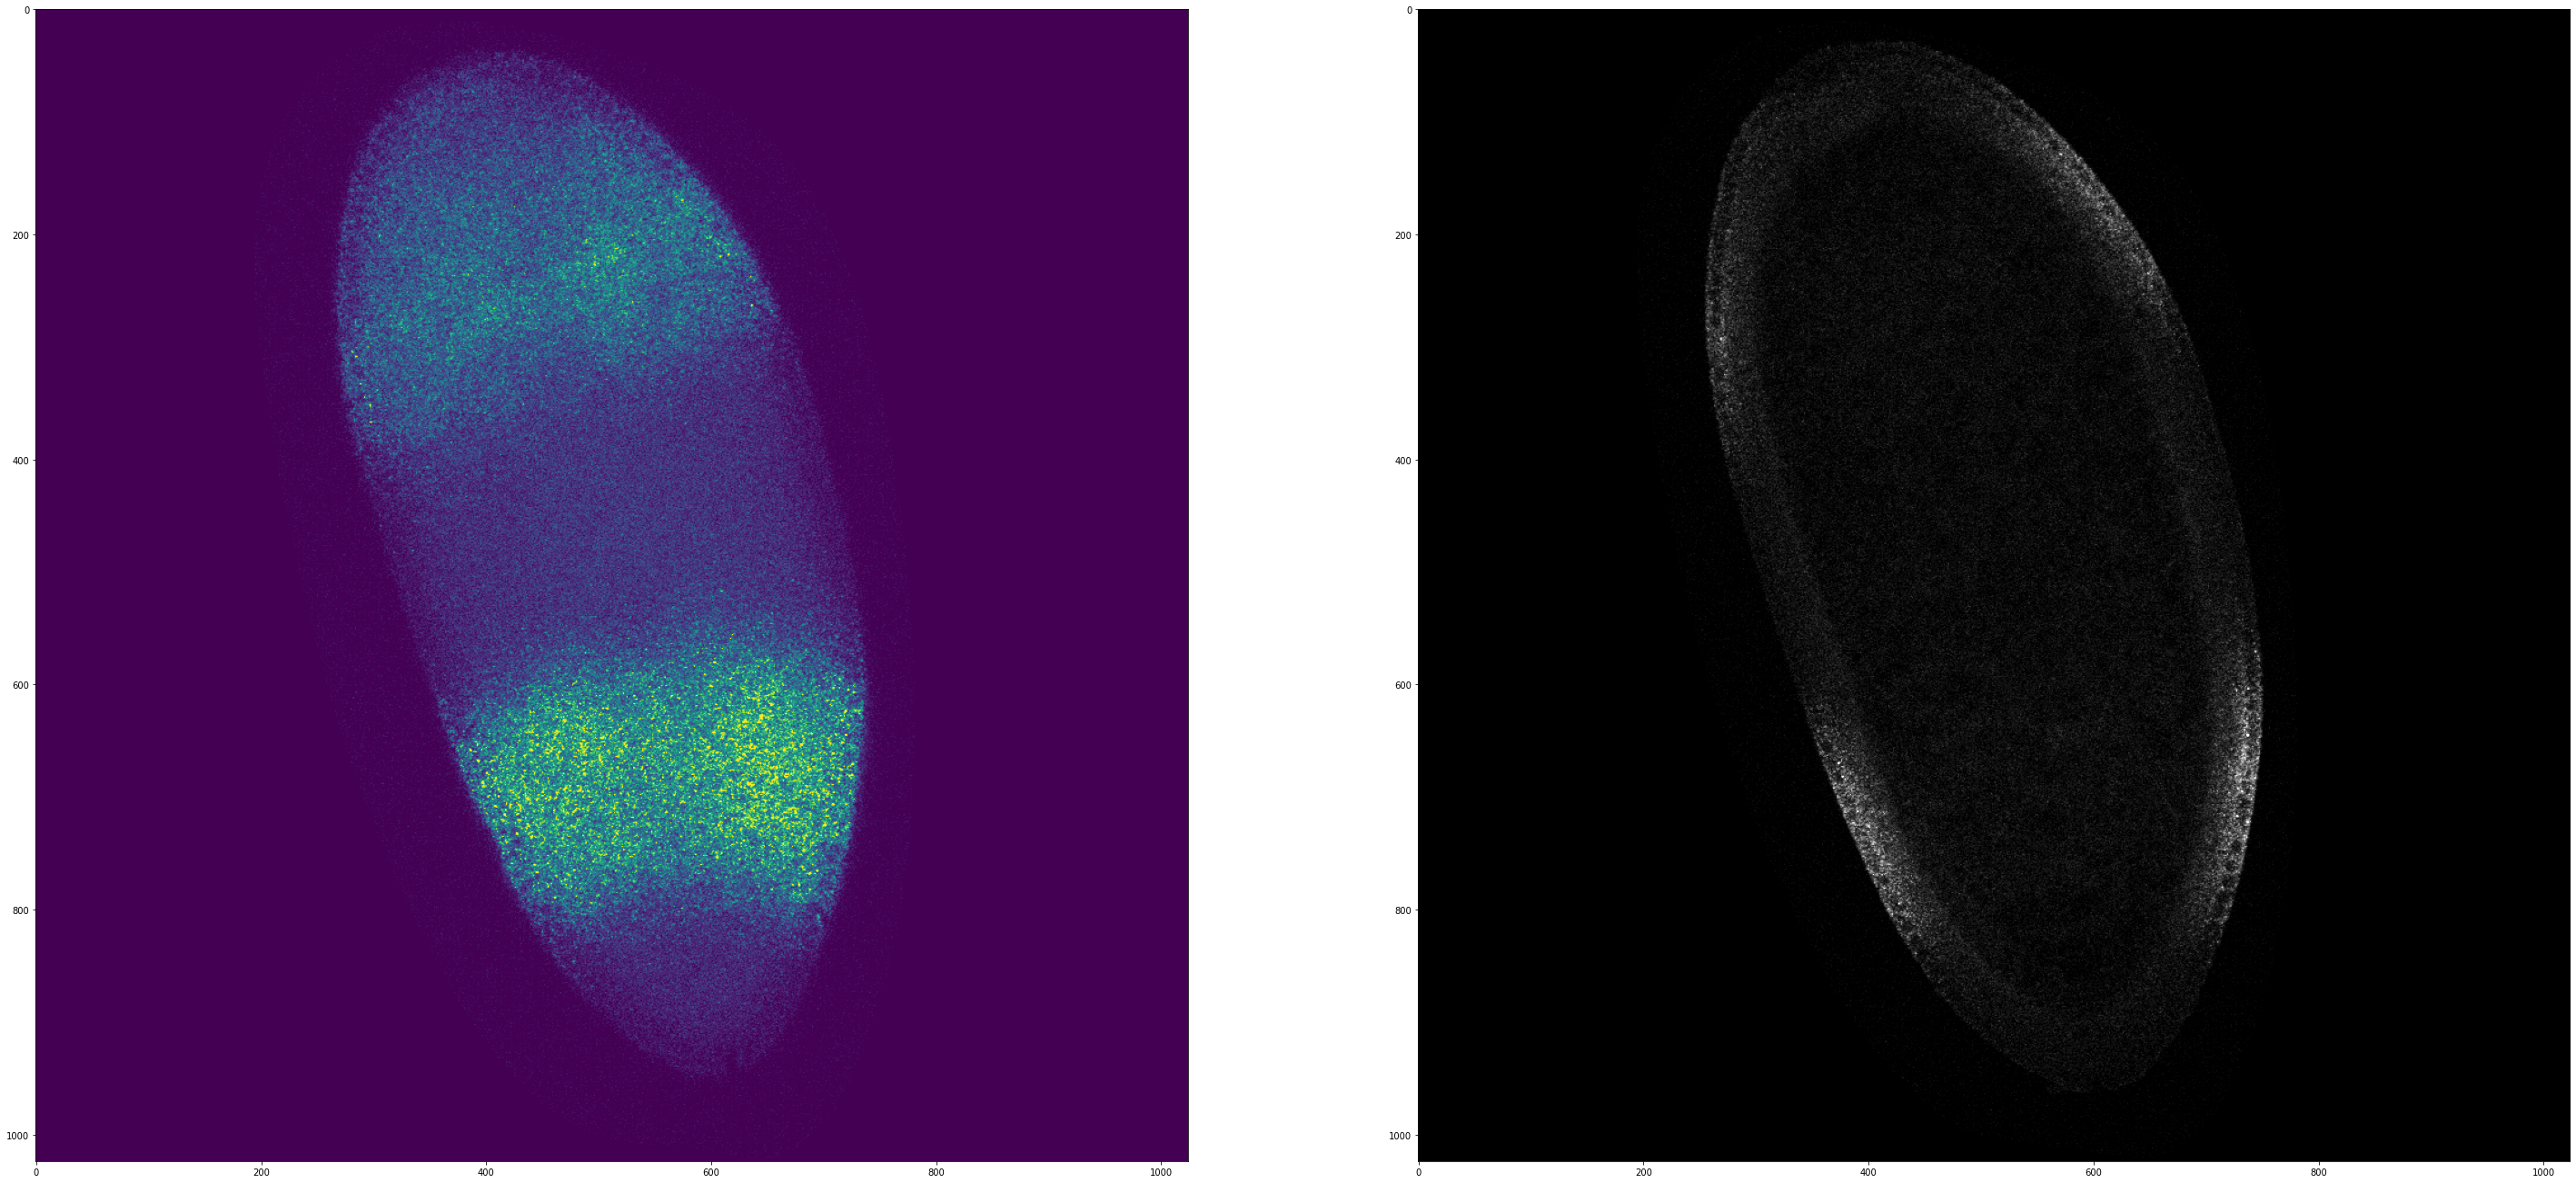

In [3]:
#Taking a look at the embryo

fig=plt.figure(figsize=(50, 50))  # increase image size
ax=fig.add_subplot(1,2,1)
plt.imshow(czi.squeeze()[2,10,:,:], vmin=110, vmax=1000)

img=czi.squeeze() #this will squeeze the image above and make it easier for me to manipulate
print(type(img),img.shape,img.dtype)

ax=fig.add_subplot(1,2,2)
plt.imshow(img[2,27,:,:], cmap='gray', vmin=110, vmax=1000) # colormap and contrast limits
#plt.axis('off');  # remove axes


In [18]:
# check out the datatype

print(img.shape, img.dtype)

(5, 47, 1024, 1024) uint16


In [19]:
# uh-oh the above datashape has 1 extra dimension (the 5 channels)
# so therefore we need to specify which channel we are interested in. In this case, let's do channel 2, the gt channel
img_DAPI=img[0,:,:,:]
img_gt=img[2,:,:,:]
img_pho=img[3,:,:,:]
img_hb=img[4,:,:,:]

print(img_gt.shape, img_gt.dtype)

(47, 1024, 1024) uint16


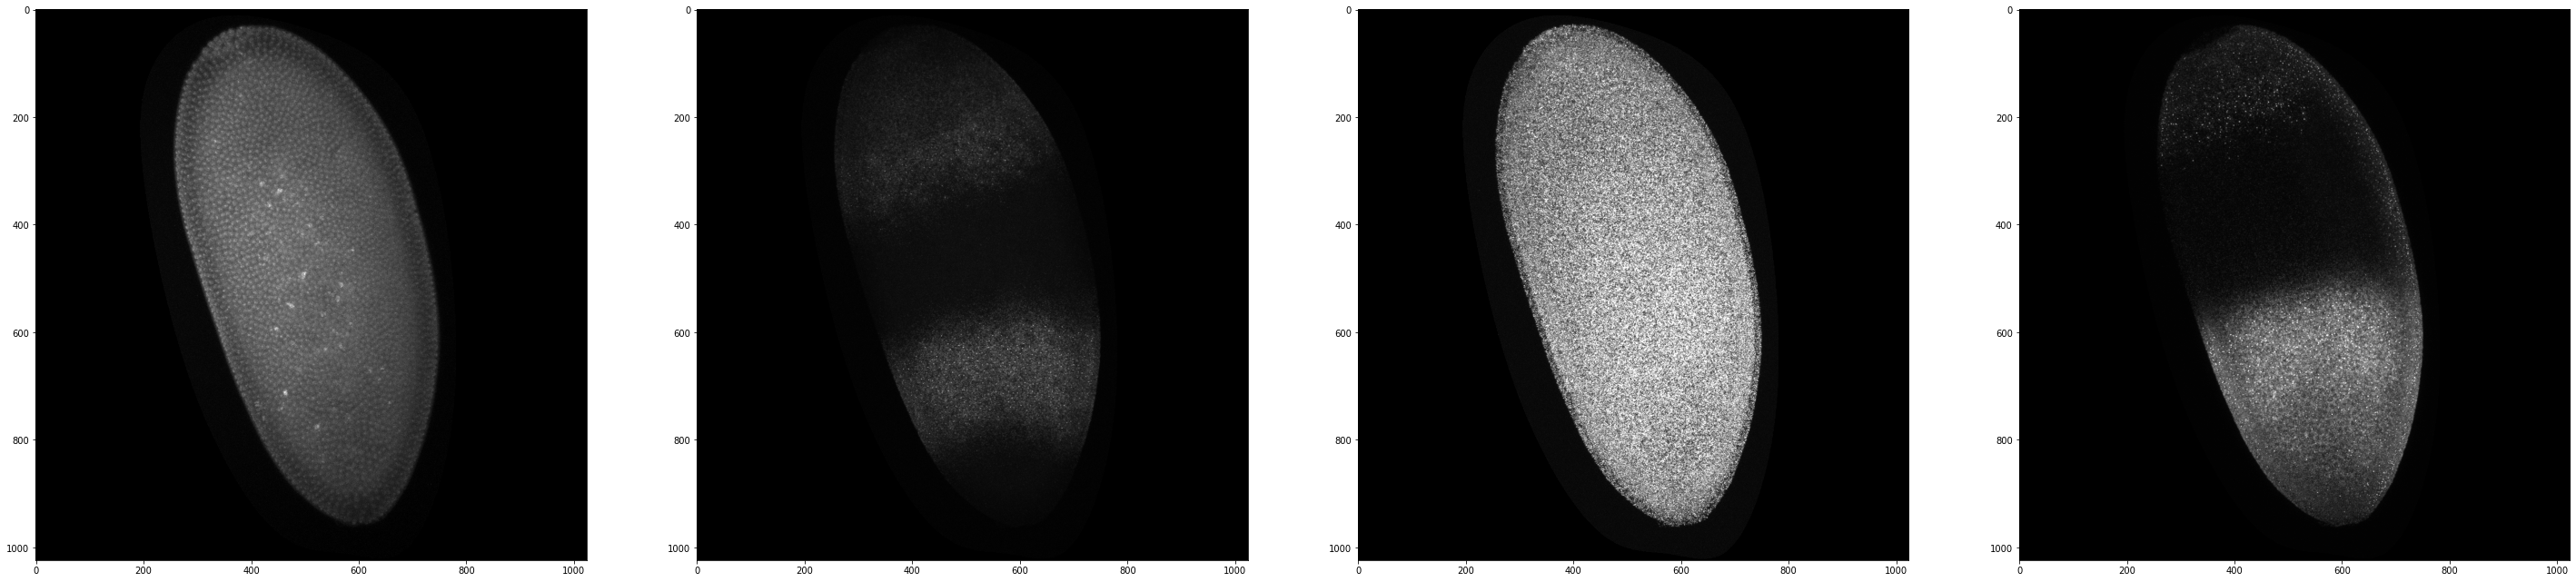

In [20]:
#create max projection. to make MIP you need to make sure you are only in 1 channel (the code above)
max_projection_DAPI = img_DAPI.max(0)
max_projection_gt = img_gt.max(0)
max_projection_pho = img_pho.max(0)
max_projection_hb = img_hb.max(0)

fig = plt.figure(figsize=(50,150))
ax=fig.add_subplot(1,4,1)
plt.imshow(max_projection_DAPI, cmap='gray', vmin=110, vmax=4000)
ax=fig.add_subplot(1,4,2)
plt.imshow(max_projection_gt, cmap='gray', vmin=110, vmax=4000)
ax=fig.add_subplot(1,4,3)
plt.imshow(max_projection_pho, cmap='gray', vmin=110, vmax=4000)
ax=fig.add_subplot(1,4,4)
plt.imshow(max_projection_hb, cmap='gray', vmin=110, vmax=4000)


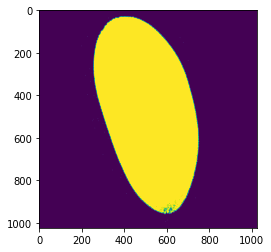

In [21]:
mask_emb = max_projection_DAPI > 500
plt.imshow(mask_emb)

TypeError: Image data of dtype object cannot be converted to float

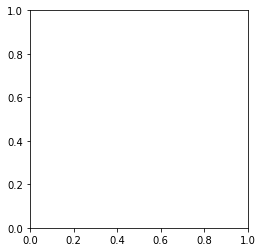

In [25]:
# using the mask, segment the boundaries of the embryo

strel = cv2.imread('mask_emb')
plt.imshow(strel)

# find the plane with the largest ellipse and extract plane for future analysis

# extract planes +/- 3 from 'center' plane. save for future analysis

In [ ]:
# using max_projection_hb, identify the dorsal/ventral axis


# make the computer create an ellipse from the mask and identify the long axis of the elipse


# using max_projection_hb, identify which side of the ellipse has more signal (this will be the ventral side)

In [ ]:
# create a box (size tbd) that will run perpindicular to the ventral long axis

# extract channel signal from the box

In [ ]:
# run box along the three planes (center_plane, upper_bound, lower_bound)

# average traces between the three planes

# stats on the 3 traces to ensure no outliers

# plot average trace from each channel

<Figure size 360x360 with 0 Axes>

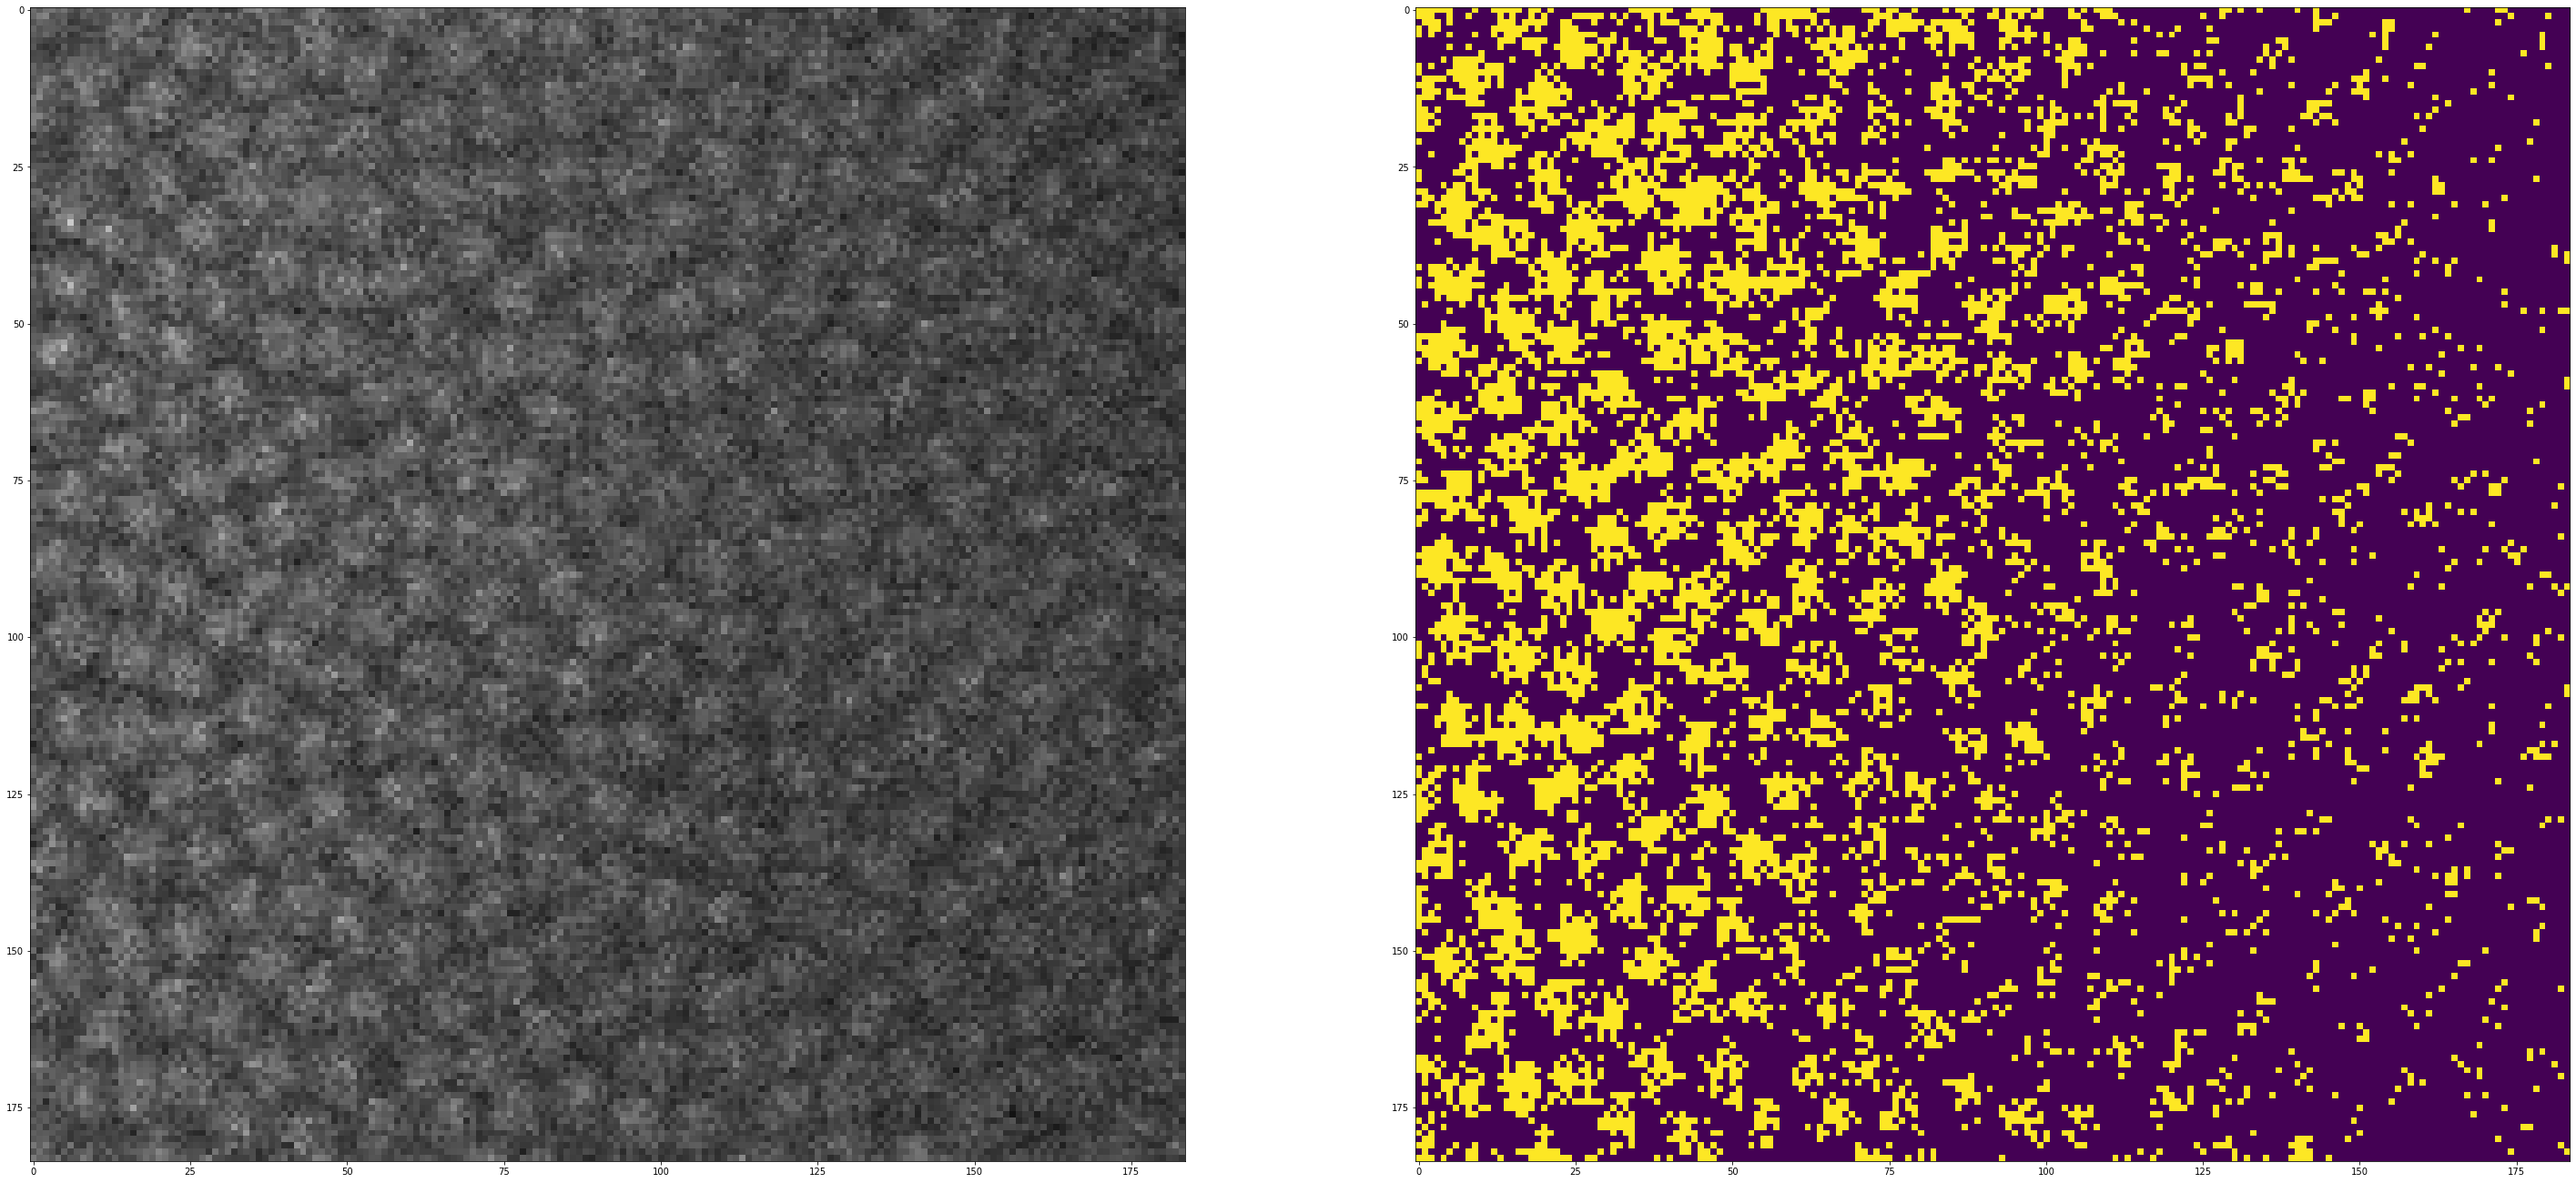

In [78]:
# determine age of the embryo from the DAPI signal

plt.figure(figsize=(5, 5))  # increase image size


DAPI_cropped = img[0,5, 420:604, 420:604]
DAPI_cropped.shape
mask_age = DAPI_cropped > 1500



fig = plt.figure(figsize=(50,150))
ax=fig.add_subplot(1,2,1)
plt.imshow(DAPI_cropped, cmap='gray', vmin=100, vmax=4000)
ax=fig.add_subplot(1,2,2)
plt.imshow(mask_age)



3178
385


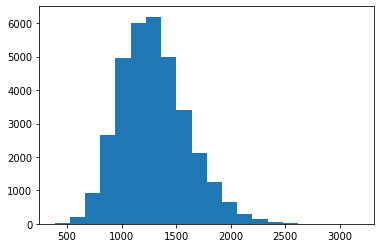

In [74]:
intensity=DAPI_cropped.flatten()
plt.hist(intensity, bins=20)

print (np.max(intensity))
print (np.min(intensity))

In [30]:
nuclei = cv2.imread('DAPI_cropped',0)

from cv2 import 

th3 = cv2.adaptiveThreshold(nuclei,2000,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-2id2kgtb/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'
